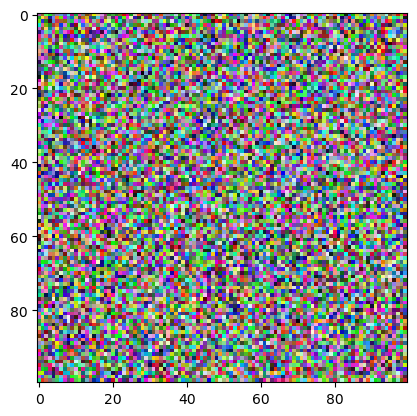

In [1]:
# Used to change filepaths
from pathlib import Path
# we set up matplotlib, pandas, and the display function
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display
import pandas as pd
# import numpy to use in this cell
import numpy as np
# import image from PIL so we can use it Later
from PIL import Image
# generate test_data
test_data = np.random.beta(1, 1, size = (100, 100, 3))
# display the test_data
plt.imshow(test_data)

The image size is:(100, 100)


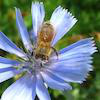

In [2]:
# open the image
img = Image.open(r"C:\Users\lenovo\Documents\Image20240709160111.jpg")

# Get the image size
img_size = img.size

print("The image size is:{}".format(img_size))

# just having the imae as the last line in the cell will display it in the notebook
img

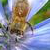

In [3]:
# Crop the image to 25,25,75, 75
img_cropped = img.crop([25, 25,75, 75])
display(img_cropped)

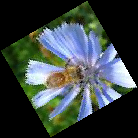

In [4]:
# rotate the image by 45 degrees
img_rotated = img.rotate(120, expand = 25)
display (img_rotated)

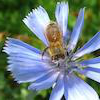

In [5]:
# flip the image left to right
img_flipped = img.transpose(Image.FLIP_LEFT_RIGHT)
display(img_flipped)

Our Numpy array has the shape:(100, 100, 3)


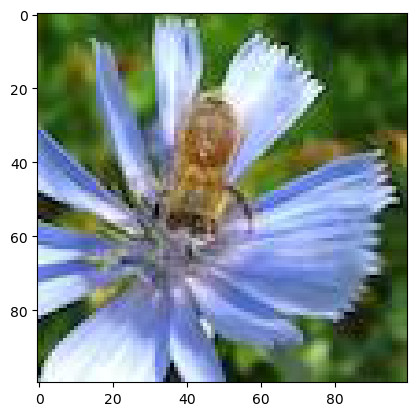

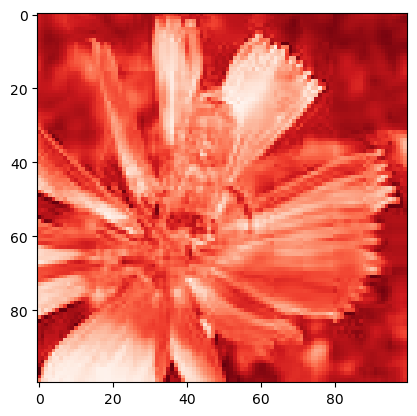

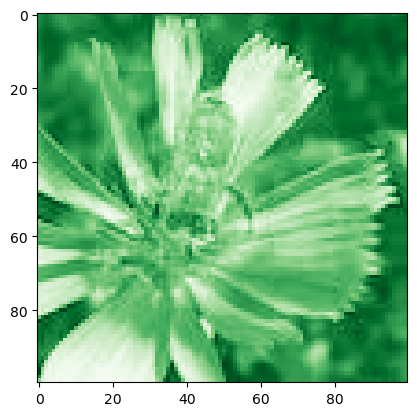

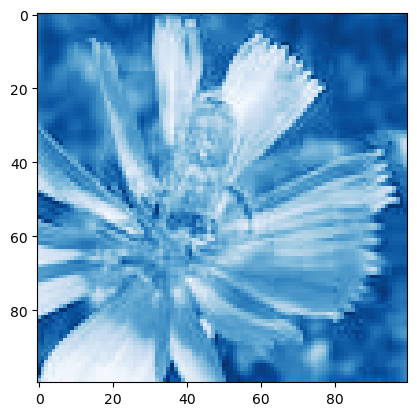

In [6]:
# Turn our image object inot a Numpy array
img_data = np.array(img)
img_data

# get the shape of the resulting arragy
img_data_shape = img_data.shape
print("Our Numpy array has the shape:{}".format(img_data_shape))

# plot the data with imshow
plt.imshow(img_data)
plt.show()

# plot the red channel
plt.imshow(img_data[:,:, 0], cmap=plt.cm.Reds_r)
plt.show()

# plot the green channel
plt.imshow(img_data[:,:, 0], cmap=plt.cm.Greens_r)
plt.show()

# plot the blue channel
plt.imshow(img_data[:,:, 0], cmap=plt.cm.Blues_r)
plt.show()


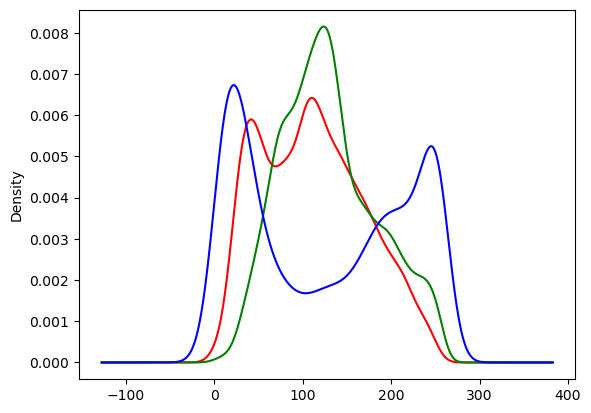

In [7]:
def plot_kde(channel, color):
    """ plots a kernel density estimate for the given data.
    'channel'must be a 2d array
    'color' must be a color string, e.g. 'r', 'g', or 'b'
    """
    data = channel.flatten()
    return pd.Series(data).plot.density(c=color)

# create the list of channels
channels = ['r', 'g', 'b']

def plot_rgb(image_data):
    # use enumerate to loop over colors and indexes
    for ix, color in enumerate(channels):
        plot_kde(image_data[:,:, ix], color)

plt.show()

plot_rgb(img_data)

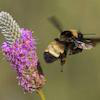

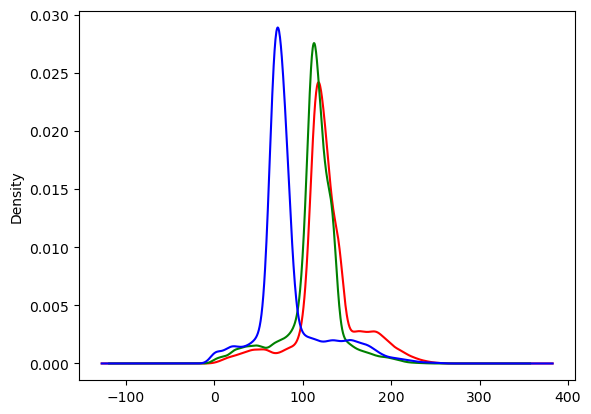

In [8]:
# Load bee_12.jpg as honey
honey = Image.open(r"C:\Users\lenovo\Documents\Image20240709160056.jpg")

# display the honey bee image
display(honey)

# Numpy array of the honey bee image data
honey_data = np.array(honey)

# plot the rgbs densities for the honey bee image
plot_rgb(honey_data)

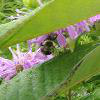

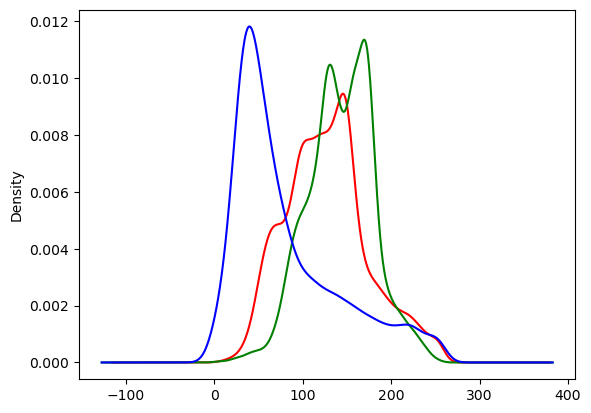

In [9]:
# Load bee_13.jpg as honey
honey = Image.open(r"C:\Users\lenovo\Documents\Honey_bees\images\58.jpg")

# display the honey bee image
display(honey)

# Numpy array of the honey bee image data
honey_data = np.array(honey)

# plot the rgbs densities for the honey bee image
plot_rgb(honey_data)

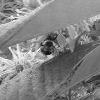

Our Numpy array has the shape:(100, 100)


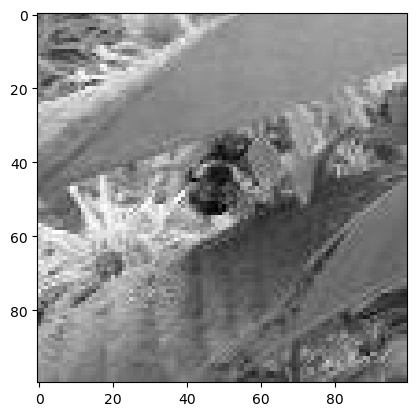

<Axes: ylabel='Density'>

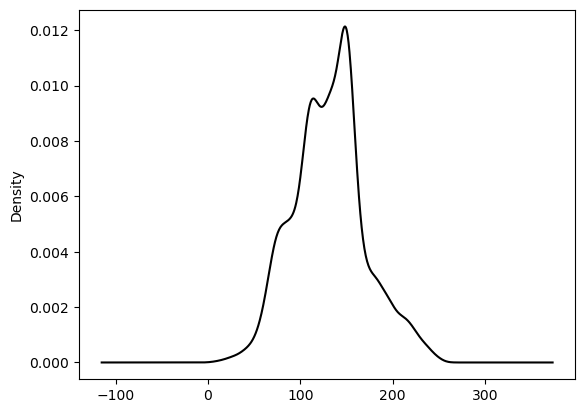

In [10]:
# convert to grayscale
honey_bw = honey.convert("L")
display(honey_bw)


#convert the image to a NUmpy array
honey_bw_arr = np.array(honey_bw)

# get the shape of hte resulting array
honey_bw_arr_shape = honey_bw_arr.shape
print("Our Numpy array has the shape:{}". format(honey_bw_arr_shape))

# plot the array using matplotlib
plt.imshow(honey_bw_arr, cmap=plt.cm.gray)
plt.show()

# plot the kde of the new black and white array
plot_kde(honey_bw_arr, 'k')

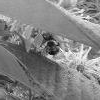

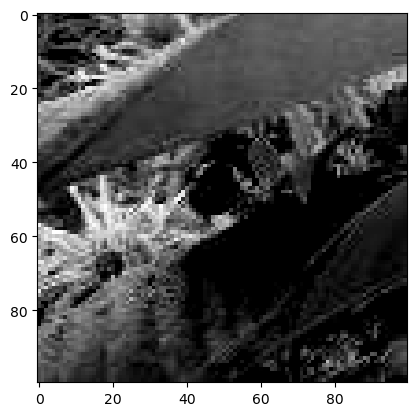

In [11]:
# flip the image left-right with transpose
honey_bw_flip = honey_bw.transpose(Image.FLIP_LEFT_RIGHT)

# show the flipped image
display(honey_bw_flip)

# save the flipped image
honey_bw_flip.save(r"C:\Users\lenovo\Documents\Honey_bees\images\bw_flipped.jpg")

# create higher contrast by reducing range
honey_hc_arr = np.maximum(honey_bw_arr, 100)

#show the higher contrast version
plt.imshow(honey_hc_arr, cmap = plt.cm.gray)

# conver the Numpy array of high contrast to an image
honey_bw_hc = Image.fromarray(honey_hc_arr)

# save the high contrast version
honey_bw_hc.save(r"C:\Users\lenovo\Documents\Honey_bees\images\bw_hc.jpg")

In [12]:
image_paths = [r"C:\Users\lenovo\Documents\Honey_bees\images\20.jpg",
               r"C:\Users\lenovo\Documents\Honey_bees\images\33.jpg",
                r"C:\Users\lenovo\Documents\Honey_bees\images\58.jpg",
                r"C:\Users\lenovo\Documents\Honey_bees\images\65.jpg",
                r"C:\Users\lenovo\Documents\Honey_bees\images\85.jpg"]

def process_image(path):
    img  = Image.open(path)

    # create paths to save files to 
    bw_path =  r"C:\Users\lenovo\Documents\Honey_bees\save_img\1{}.jpg".format(path.stem)
    rcz_path = r"C:\Users\lenovo\Documents\Honey_bees\save_img\2{}.jpg".format(path.stem)
    
    print("Creating grayscale version of {} and saving to {}.".format(path, bw_path))
    bw = img.convert("L")
    bw.save(bw_path)
    
    print("Creating roatated, cropped, and zoomed version of {} and saving to {}.".format(path, rcz_path))
    rcz = bw.rotate(45).crop([25,25,75,75]).resize((100,100))
    rcz.save(rcz_path)

#for loop aver image paths
for img_path in image_paths:
    process_image(Path(img_path))

Creating grayscale version of C:\Users\lenovo\Documents\Honey_bees\images\20.jpg and saving to C:\Users\lenovo\Documents\Honey_bees\save_img\120.jpg.
Creating roatated, cropped, and zoomed version of C:\Users\lenovo\Documents\Honey_bees\images\20.jpg and saving to C:\Users\lenovo\Documents\Honey_bees\save_img\220.jpg.
Creating grayscale version of C:\Users\lenovo\Documents\Honey_bees\images\33.jpg and saving to C:\Users\lenovo\Documents\Honey_bees\save_img\133.jpg.
Creating roatated, cropped, and zoomed version of C:\Users\lenovo\Documents\Honey_bees\images\33.jpg and saving to C:\Users\lenovo\Documents\Honey_bees\save_img\233.jpg.
Creating grayscale version of C:\Users\lenovo\Documents\Honey_bees\images\58.jpg and saving to C:\Users\lenovo\Documents\Honey_bees\save_img\158.jpg.
Creating roatated, cropped, and zoomed version of C:\Users\lenovo\Documents\Honey_bees\images\58.jpg and saving to C:\Users\lenovo\Documents\Honey_bees\save_img\258.jpg.
Creating grayscale version of C:\Users\l

## ML- predict honey bees species from images

In [13]:
# used to change filepaths
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline
import pandas as pd
import numpy as np

# import Image from PIL
from PIL import Image
from skimage.feature import hog
from skimage.color import rgb2gray
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# import train_test_split from sklearn's model selection module
from sklearn.model_selection import train_test_split

# import SVC from sklearn's svm module
from sklearn.svm import SVC

# import accuracy_score from skleran's metrics module
from sklearn.metrics import roc_curve, auc, accuracy_score


,genus
id,
520,1
3800,1
3289,1
2695,1
4922,1


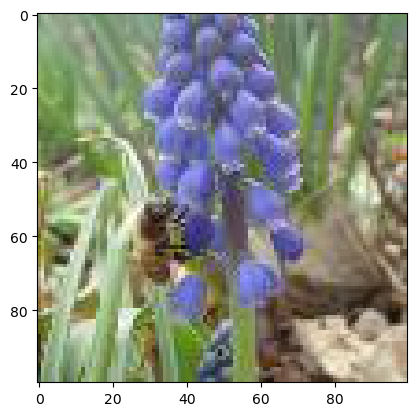

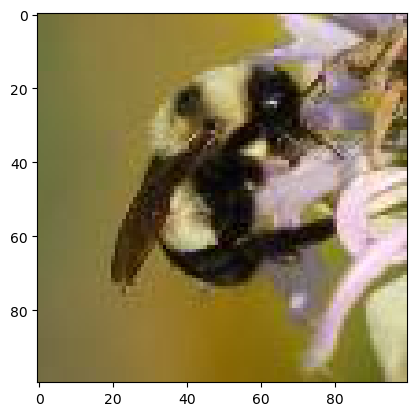

In [14]:
# Load the Labels using pandas
labels = pd.read_csv(r"C:\Users\lenovo\Documents\Honey_bees\labels.csv", index_col = 0)

# show the first five rows of the dataframe using head
display(labels.head())

def get_image(row_id, root= r"c:\Users\lenovo\Documents\Honey_bees\images"):
    """
    Converts an image number into the file path where the image is located,
    opens the image, and returns the image as a numpy array.
    """
    filename = "{}.jpg".format(row_id)
    file_path = os.path.join(root, filename)
    img = Image.open(file_path)
    return np.array(img)

#subset the dataframe to just Apis(genus is 0.0) get the value of the sixth item in the index
apis_row = labels[labels.genus ==0.0].index[5]


# show the corresponding image of an Apis
plt.imshow(get_image(apis_row))
plt.show()

# subset the dataframe to just Bombus (genus is 1.0) get the value of the sixth item in the index
bombus_row = labels[labels.genus == 1.0].index[5]

# show the corresponding image of a Bambus
plt.imshow(get_image(bombus_row))
plt.show()
    

Color bombus image has shape:  (100, 100, 3)
Grayscale bombus image has shape: (100, 100)


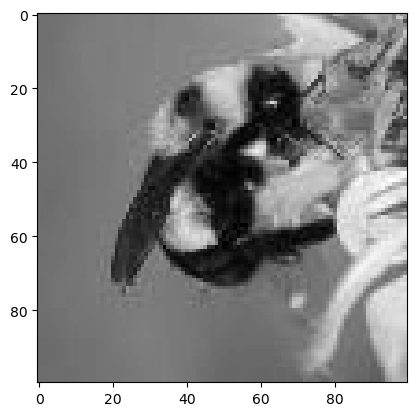

In [15]:
# Load a bombus image using our get_image function and bombus_row from the previous cell

bombus = get_image(bombus_row)

# print the shape of the bombus image
print('Color bombus image has shape: ', bombus.shape)

# convert the bombus image to grayscae
gray_bombus = rgb2gray(bombus)

# show the grayscale image
plt.imshow(gray_bombus, cmap=mpl.cm.gray)

# confirm grayscale bombus image only hsa one channel
print('Grayscale bombus image has shape:', gray_bombus.shape)

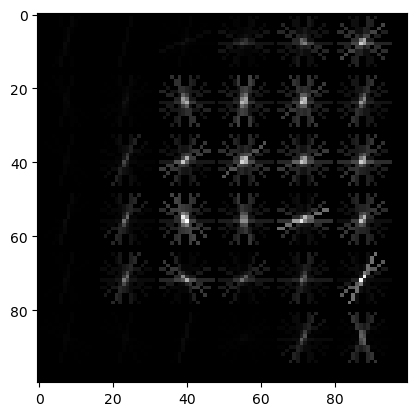

In [16]:
# run HOG usng our grayscale bombus image
hog_features, hog_image = hog(gray_bombus, visualize = True, block_norm='L2-Hys',
                              pixels_per_cell = (16,16))

# show our hog_image with a gray colormap
plt.imshow(hog_image, cmap=mpl.cm.gray)

In [17]:
def create_features(img):
    # flatten three channel color image
    color_features = img.flatten()
    #convert image to grayscale
    gray_image = rgb2gray(img)
    # get HOG features from grayscale image
    hog_features = hog(gray_image, block_norm='L2-Hys', pixels_per_cell=(16,16))
    #combine color and hog features into a single array
    flat_features = np.hstack([color_features, hog_features])
    return flat_features

bombus_features = create_features(bombus)
# print shape of bombus_features
bombus_features.shape

(31296,)

In [18]:
def create_feature_matrix(label_dataframe):
    features_list = []
    for img_id in label_dataframe.index:
        # Load image
        img = get_image(img_id)
        # get features
        image_features = create_features(img)
        features_list.append(image_features)
    # convert list of arrays into a matrix
    feature_matrix = np.array(features_list)
    return feature_matrix

# rung create_feture_matrix on our dataframe of images
feature_matrix = create_feature_matrix(labels)

In [19]:
len(feature_matrix)

500

In [20]:
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(feature_matrix,labels.genus.values, test_size = 0.3, random_state=1234)

# Look at the distribution of Labels in the train set
pd.Series(y_test).value_counts()

0    76
1    74
Name: count, dtype: int64

In [21]:
# get shape of our training features
print('Training features matrix shape is: ', X_train.shape)

# define standard scaler
ss= StandardScaler()

#fit the Scaler and transform the training features
train_stand = ss.fit_transform(X_train)

# use fit_transoform to run PCA on our standardized training features
test_stand = ss.transform(X_test)

# Look at the new shape of the standardized feature matrics
print('Standardized training features matrix shape is: ',train_stand.shape)
print('Standardized test features matrix shape is:', test_stand.shape)

Training features matrix shape is:  (350, 31296)
Standardized training features matrix shape is:  (350, 31296)
Standardized test features matrix shape is: (150, 31296)


In [22]:
# Instantiate a PCA object wiht 350 components # principle components analysis
pca = PCA(n_components= 350)

# use fit_transform on our standardized training features
X_train = pca.fit_transform(train_stand)

# use transform on our standardized test features
X_test = pca.transform(test_stand)

# look at the new shape of the transformed matrices
print('Training features matrix is: ',X_train.shape)
print('test features matrix is: ', X_test.shape)

Training features matrix is:  (350, 350)
test features matrix is:  (150, 350)


In [23]:
# define support vector classifier
svm = SVC(kernel='linear', probability=True, random_state=42)

# fit model
svm.fit(X_train, y_train)

# generate predications
y_pred = svm.predict(X_test)

# cacluculate accuracy
accuracy = accuracy_score(y_test,y_pred)
print('Model accuracy is: ',accuracy)

Model accuracy is:  0.6266666666666667


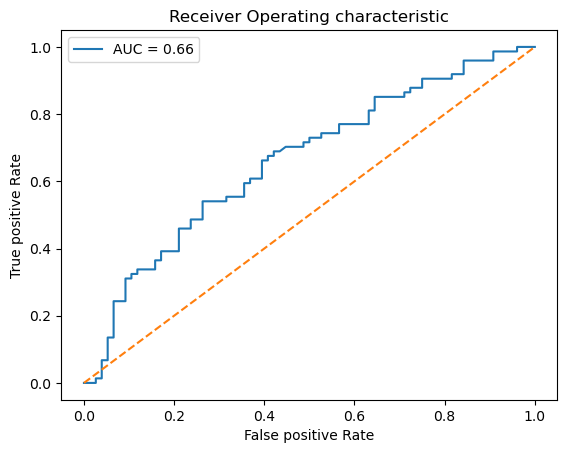

In [26]:
# predict probabilites for X_test using predict_proba
probabilities = svm.predict_proba(X_test)

# select the probabilitees for label 1.0
y_proba = probabilities[:,1]

# calculate false positive rate and true positibe rate at different thresholds
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_proba, pos_label =1)

# calculate AUC
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating characteristic')

# plot the false positive rate on the x axis and the true positive rate on the y axis
roc_plot = plt.plot (false_positive_rate, true_positive_rate, label= 'AUC = {:0.2f}'.format(roc_auc))
plt.legend(loc=0)
plt.plot([0,1],[0,1],ls='--')
plt.ylabel('True positive Rate')
plt.xlabel('False positive Rate');

## Deep Learning with images

In [31]:
import pickle
from pathlib import Path
from skimage import io
from sklearn.metrics import classification_report 

# import keras library
import keras
# import sequential from the keras models module
from keras.models import Sequential

# import Dense, Droupout, Flatten, conv2D, Maxpooling2D form the keras Layers module
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [32]:
# # load labels.csv from datasets folder using pandas
# labels = pd.read_csv(r"C:\Users\excel\DATA Science\Datasets\Honey_bees\labels.csv", index_col=0)
# # print value counts for genus
# print(labels.genus.value_counts())
# assign the genus label values to y
y = labels.genus.values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [35]:
# create empty list
image_list =[]
for i in labels.index:
    # load image
    img = io.imread(r"C:\Users\lenovo\Documents\Honey_bees\images\{}.jpg".format(i)).astype(np.float64)

    # append to list to single array
    image_list.append(img)
# convert image list to single array
X = np.array(image_list)
print(X.shape)
                    

(500, 100, 100, 3)


In [36]:
# split out evaluation sets (x_eval and y_eval)
x_interim, x_eval, y_interim, y_eval = train_test_split(X, y, test_size=0.2, random_state=52)

# split remaining data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_interim, y_interim, test_size=0.4, random_state=52)

# examine number of samples in train, test, and validation sets
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_eval.shape[0], 'eval samples')

x_train shape: (240, 100, 100, 3)
240 train samples
160 test samples
100 eval samples


In [38]:
# initialize standard scaler
ss = StandardScaler()
def scale_features(train_features, test_features):
    for image in train_features:
        # for each channel, apply standard scaler's fit_transforms method
        for channel in range(image.shape[2]):
            image[:, :, channel] = ss.fit_transform(image[:,:, channel])
    for image in test_features:
        # for each channel, apply standard scaler's transfrom method 
        for channel in range(image.shape[2]):
            image[:,:, channel] = ss.transform(image[:,:, channel])

# apply scale_fetures to four sets of features
scale_features(x_interim, x_eval)
scale_features(x_train, x_test)


In [39]:
# set model constants
num_classes =1
# define model as Sequential
model = Sequential()
# first convolutional layer wiht 32 filters
model.add (Conv2D(32, kernel_size =(3,3), activation = 'relu', input_shape= (100, 100,3)))
# add a second 2D convolutional layer wiht 64 filters
model.add(Conv2D(64, kernel_size= (3,3), activation = 'relu'))

In [40]:
# reduce dimensionality through max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# third convolutional layer with 64 filters
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# add dropout to prevent over fitting
model.add(Dropout(0.25))
# necessary flatten step preceeding dense layer
model.add(Flatten())
# fully connected layer
model.add(Dense(128, activation='relu'))
# add additional dropout to prevent overfitting
model.add(Dropout(0.5))
# prediction layers
model.add(Dense(num_classes, activation='sigmoid', name='preds'))
# show model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 48, 48, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 dropout (Dropout)           (None, 46, 46, 64)        0         
                                                                 
 flatten (Flatten)           (None, 135424)            0         
                                                        

In [41]:
model.compile(
    # set the loss as binary_crossentropy
    loss = keras.losses.binary_crossentropy,
    # set the optimizer as stochastic gradient descent
    optimizer = keras.optimizers. SGD (learning_rate = 0.001),
    # set the metric as accuracy
    metrics = ['accuracy'])

# mock_train the model using the first ten observations of the train and test sets
model.fit(x_train, y_train,epochs=5, verbose=1, validation_data=(x_test, y_test))

Epoch 1/5
8/8 [==============================] - 8s 782ms/step - loss: 0.7110 - accuracy: 0.5083 - val_loss: 0.7000 - val_accuracy: 0.4437
Epoch 2/5
8/8 [==============================] - 6s 730ms/step - loss: 0.6976 - accuracy: 0.5042 - val_loss: 0.6980 - val_accuracy: 0.5250
Epoch 3/5
8/8 [==============================] - 6s 711ms/step - loss: 0.6697 - accuracy: 0.5875 - val_loss: 0.7003 - val_accuracy: 0.5625
Epoch 4/5
8/8 [==============================] - 5s 694ms/step - loss: 0.6554 - accuracy: 0.6333 - val_loss: 0.7264 - val_accuracy: 0.5250
Epoch 5/5
8/8 [==============================] - 6s 695ms/step - loss: 0.6658 - accuracy: 0.5833 - val_loss: 0.6986 - val_accuracy: 0.5625


In [42]:
model.save(r"C:\Users\lenovo\Documents\Honey_bees\bees_trained.keras")

In [47]:
# load pre- trained model
pretrained_cnn = keras.models.load_model (r"C:\Users\lenovo\Documents\Honey_bees\bees_trained.keras")

# evaluate model on test set
score = pretrained_cnn.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print("----------------")

# evaluate model on holdout set
eval_score = pretrained_cnn.evaluate(x_eval, y_eval, verbose=0)

# print loss score
print('Eval loss:', eval_score[0])
# print accuracy score
print ('Eval accuracy:', eval_score[1])

Test loss: 0.6843844652175903
Test accuracy: 0.5249999761581421
----------------
Eval loss: 0.7209969162940979
Eval accuracy: 0.46000000834465027


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


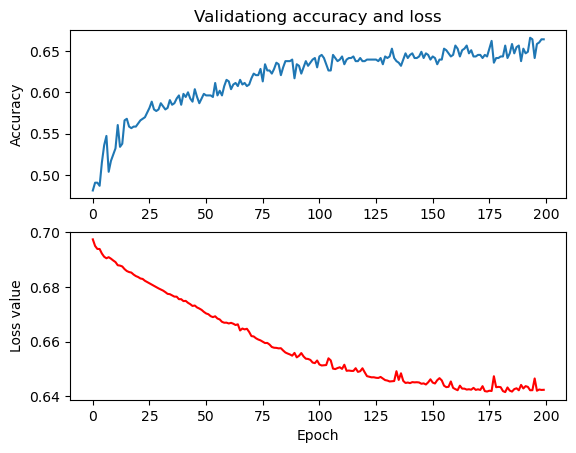

In [48]:
# load history
with open(r"C:\Users\lenovo\Documents\Honey_bees\model_history.pkl", 'rb')as f:
    pretrained_cnn_history = pickle.load(f)

# print keys for pretrained_cnn_history dict
print(pretrained_cnn_history.keys())
fig = plt.figure(1)
plt.subplot(211)
# plot the validation accuracy
plt.plot(pretrained_cnn_history['val_acc'])
plt.title('Validationg accuracy and loss')
plt.ylabel('Accuracy')
plt.subplot(212)

# plot the validation loss
plt.plot(pretrained_cnn_history['val_loss'], 'r')
plt.xlabel('Epoch')
plt.ylabel('Loss value');

In [50]:
# predicted probabilities for x_level
y_proba = pretrained_cnn.predict(x_eval)
print("First five probabilities:")
print(y_proba[:5])
print("")

# preicted classes for x_eval
y_pred = np.round(y_proba).astype('int')
print("First five class precitions:")
print(y_pred[:5])
print("")

4/4 [==============================] - 1s 101ms/step
First five probabilities:
[[0.57451195]
 [0.53767693]
 [0.6653036 ]
 [0.5375427 ]
 [0.52791876]]

First five class precitions:
[[1]
 [1]
 [1]
 [1]
 [1]]

